In [1]:
import pandas as pd
import numpy as np
import scanpy as sc
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from decimal import Decimal
import os

In [337]:
status.to_csv("echidna_clone_status.csv")

In [2]:
PATH = "hmm_all_pt/"
status = pd.DataFrame()
for patient in os.listdir(PATH):
    if "_" not in patient:
        #print(patient)
        pt_st = pd.read_csv(PATH+patient+"/"+patient+"_status.csv", index_col=0)
        pt_st.index = [patient+"_"+str(i) for i in pt_st.index]
        pt_st.columns = [0]
        status = pd.concat((status, pt_st),axis=0)

In [19]:
PATH = "hmm_all_pt/"

import os
all_delta_eta = pd.DataFrame()
for patient in os.listdir(PATH):
    if "_" not in patient:
        #print(patient)
        eta = pd.read_csv(PATH+patient+"/"+patient+"_delta_eta.csv", index_col=0)
        all_delta_eta = pd.concat((all_delta_eta, eta),axis=1)

In [4]:
import os
ip = pd.DataFrame()
for patient in os.listdir(PATH):
    if "_" not in patient:
        #print(patient)
        pt_ip = pd.read_csv(PATH+patient+"/"+patient+"_gde.csv", index_col=0)
        pt_ip.columns = [patient+"_"+str(i) for i in pt_ip.columns]
        ip = pd.concat((ip, pt_ip),axis=1)

In [5]:
hvg_dict = {}
for patient in os.listdir(PATH):
    if "_" not in patient:
        #print(patient)
        X = sc.read_h5ad(PATH+patient+"/"+patient+"_X.h5")
        var = X.X.var(axis=0)
        thresh = np.quantile(var, 0.75)
        var = pd.DataFrame(var, index=X.var_names)
        hvg_dict[patient] = var[var[0]>thresh].index

In [6]:
cell_data = pd.DataFrame()
for patient in os.listdir(PATH):
    if "_" not in patient:
        print(patient)
        X = sc.read_h5ad(PATH+patient+"/"+patient+"_X.h5")
        obs = X.obs
        cell_data = pd.concat((cell_data, obs[["echidna_clones", "echidna_status", "sample"]]))

F16
F03
F02
F12
R310
R319
F01


In [7]:
exp = pd.DataFrame()
for patient in os.listdir(PATH):
    if "_" not in patient:
        #print(patient)
        X = sc.read_h5ad(PATH+patient+"/"+patient+"_X.h5")
        obs = X.obs
        df = X.to_df()
        for clust in np.unique(obs["leiden"]):
            exp[patient+"_"+str(clust)] = df.loc[obs[obs.leiden==clust].index].mean(axis=0)

In [9]:
df = pd.DataFrame(exp.mean(axis=1)).sort_values(by=0)
genes = df[df[0]>.5].index
genes = np.intersect1d(genes, all_delta_eta.index)

In [10]:
degs = {}
for patient in os.listdir(PATH):
    if "_" not in patient:
        print(patient)
        X = sc.read_h5ad(PATH+patient+"/"+patient+"_X.h5")
        if "growing" in np.unique(X.obs["echidna_status"]):
            var = X.X.var(axis=0)
            thresh = np.quantile(var, 0.75)
            gene_filter = var > thresh
            X = X[:, gene_filter]
            sc.tl.rank_genes_groups(X, groupby="echidna_status", method='wilcoxon')
            deg = sc.get.rank_genes_groups_df(X, group="growing").sort_values(by="logfoldchanges",ascending=False)
            deg.index = deg["names"]
            degs[patient] = deg
        else:
            print("No growing clusters")

F16


/Users/joyfan/miniconda3/envs/decipher-env/lib/python3.11/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


F03


/Users/joyfan/miniconda3/envs/decipher-env/lib/python3.11/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


F02


/Users/joyfan/miniconda3/envs/decipher-env/lib/python3.11/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


F12


/Users/joyfan/miniconda3/envs/decipher-env/lib/python3.11/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


R310


/Users/joyfan/miniconda3/envs/decipher-env/lib/python3.11/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


R319


/Users/joyfan/miniconda3/envs/decipher-env/lib/python3.11/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


F01
No growing clusters


In [11]:
degs_shrinking = {}
for patient in os.listdir(PATH):
    if "_" not in patient:
        print(patient)
        X = sc.read_h5ad(PATH+patient+"/"+patient+"_X.h5")
        if "shrinking" in np.unique(X.obs["echidna_status"]):
            var = X.X.var(axis=0)
            thresh = np.quantile(var, 0.75)
            gene_filter = var > thresh
            X = X[:, gene_filter]
            sc.tl.rank_genes_groups(X, groupby="echidna_status", method='wilcoxon')
            deg = sc.get.rank_genes_groups_df(X, group="shrinking").sort_values(by="logfoldchanges",ascending=False)
            deg.index = deg["names"]
            degs_shrinking[patient] = deg
        else:
            print("No shrinking clusters")

F16


/Users/joyfan/miniconda3/envs/decipher-env/lib/python3.11/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


F03


/Users/joyfan/miniconda3/envs/decipher-env/lib/python3.11/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


F02


/Users/joyfan/miniconda3/envs/decipher-env/lib/python3.11/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


F12


/Users/joyfan/miniconda3/envs/decipher-env/lib/python3.11/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


R310


/Users/joyfan/miniconda3/envs/decipher-env/lib/python3.11/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


R319


/Users/joyfan/miniconda3/envs/decipher-env/lib/python3.11/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


F01


/Users/joyfan/miniconda3/envs/decipher-env/lib/python3.11/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


In [12]:
wouters = pd.read_csv("wouters_mel_sigs.csv")

/var/folders/ls/bynfxvkd45n7qyly8qv285pm0000gn/T/ipykernel_31952/1428436661.py:1: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,2

In [36]:
from scipy.signal import find_peaks
from scipy.signal import peak_widths
def loll_that_pop(patient, condition, deg_dict, states, mode, n_genes=100, custom_left = None, custom_right=None, bw_adjust=.05, prominence=.5):
    deg_df = deg_dict[patient]
    deg_df.index = deg_df.names

    #subset to high variance genes and make sure all genes are present in all parameters
    inds = [i for i in hvg_dict[patient] if i in states.index]
    inds = [i for i in inds if i in exp.index]
    states = states.loc[inds]

    #subset and smooth eta
    plt.figure(figsize=(20,5))
    pt = all_delta_eta[[i for i in all_delta_eta.columns if patient in i]].loc[inds].T
    pt_gr = [i for i in pt.index if status.loc[i][0]==condition]
    pt_gr_et = pd.DataFrame(pt.loc[pt_gr].mean(axis=0), index = pt.columns)
    eta_smoothed = scipy.ndimage.gaussian_filter1d(pt_gr_et[0], sigma=20, radius=500)

    #subset expression data
    pt = exp[[i for i in all_delta_eta.columns if patient in i]].loc[inds].T
    pt_gr = [i for i in pt.index if status.loc[i][0]==condition]
    pt_gr_exp = pd.DataFrame(pt.loc[pt_gr].mean(axis=0), index = pt.columns)

    #subset gdx
    pt = ip[[i for i in all_delta_eta.columns if patient in i]].loc[inds].T
    pt_gr = [i for i in pt.index if status.loc[i][0]==condition]
    pt_gr_ip = pd.DataFrame(pt.loc[pt_gr].mean(axis=0), index = pt.columns)
    #pt_gr_ip = pt.loc[condition]
    
    #icr = np.intersect1d(list(wouters["Immune_resistance_wang"]), pt.columns)
    icr = ["S100A11","S100A6","S100A10","S100A1","PSMB4","PSMD4","ADAR","IL6R"]

    #get list of DEGs
    deg_df = deg_df[deg_df["pvals_adj"]<.05]
    if mode==1 or mode==0:    
        genes = deg_df[deg_df["logfoldchanges"]>0].sort_values(by="logfoldchanges", ascending=False).iloc[0:n_genes].index
    else:
        genes = deg_df[deg_df["logfoldchanges"]<0].sort_values(by="logfoldchanges", ascending=True).iloc[0:n_genes].index        
    genes = np.intersect1d(genes, inds)

    #construct density of DEGs, indexed across ALL HVGs (not just DEGs)
    density = []
    for gene in genes:
        density.append(list(pt_gr_exp.index).index(gene))
    #get max height of histogram bars
    counts, bin_edges, patches = plt.hist(density, bins=400)
    ax = sns.histplot(density, bins=300, kde=True, kde_kws=dict(bw_adjust=bw_adjust))
    # Extract KDE data
    kde_line = ax.get_lines()[0]  # The first line corresponds to the KDE
    kde_x = kde_line.get_xdata()
    kde_y = kde_line.get_ydata()
    
    plt.clf()   
  
    #scale max height for plotting
    scaling_factor = max(pt_gr_exp.loc[genes][0])/max(counts)
    #scaling_factor = max(pt_gr_exp.loc[genes])/max(counts)
    #print(max(counts), max(pt_gr_exp.loc[genes][0]), scaling_factor)
    weights = np.ones_like(density) * scaling_factor

    #plt.plot(kde_x, kde_y)
    plt.fill_between(kde_x, 0, kde_y, color='lightgrey')

    
    # Find peaks
    peaks, _ = find_peaks(kde_y, prominence=prominence)
    
    # Find peak widths
    results_full = peak_widths(kde_y, peaks, rel_height=0.5)  # Width at half prominence
    
    
    # Interpolated x-coordinates for the widths
    left_coords = results_full[2]
    right_coords = results_full[3]
    
    # Convert interpolated coordinates to indices
    left_indices = np.round(left_coords).astype(int)
    right_indices = np.round(right_coords).astype(int)


    #figure out which peaks correspond to amps
    hotspot_inds = []
    for i in range(len(left_coords)):
        if scipy.stats.mode(states[int(round(kde_x[left_indices[i]],0)):int(round(kde_x[right_indices[i]],0))])[0]==mode:
            
            hotspot_inds.append(i)
            
    peaks = peaks[hotspot_inds]
    left_indices = left_indices[hotspot_inds]
    right_indices = right_indices[hotspot_inds]


    if custom_left is not None:
        left_indices = list(left_indices)+custom_left
        right_indices = list(right_indices)+custom_right
    
    # Plot the results
    #plt.plot(kde_x[peaks], kde_y[peaks], "rx", label="Peaks")
    #plt.hlines(results_full[1][hotspot_inds], kde_x[left_indices], kde_x[right_indices], color="red", lw=2, label="Widths")

    for i in range(len(left_indices)):
        plt.fill_between(kde_x[left_indices[i]:right_indices[i]+1], 0, kde_y[left_indices[i]:right_indices[i]+1], color='lightpink')

    for gene in genes:
        if gene in icr:
            plt.plot([list(pt_gr_exp.index).index(gene),list(pt_gr_exp.index).index(gene)],[0, pt_gr_exp.loc[gene][0]], c='magenta', alpha=.3)
            plt.scatter([list(pt_gr_exp.index).index(gene)],[pt_gr_exp.loc[gene]], c='magenta', s=abs(pt_gr_ip.loc[gene][0])*200)
        else:
            plt.plot([list(pt_gr_exp.index).index(gene),list(pt_gr_exp.index).index(gene)],[0, pt_gr_exp.loc[gene][0]], c='xkcd:bright blue', alpha=.3)
            plt.scatter([list(pt_gr_exp.index).index(gene)],[pt_gr_exp.loc[gene]], c='xkcd:bright blue', s=abs(pt_gr_ip.loc[gene])*200)

    plt.scatter([i for i in range(len(pt_gr_et))],[-.1 for i in range(len(pt_gr_et))], c=eta_smoothed, 
                marker="|", s=300, cmap='coolwarm', vmin=-2, vmax=2)
    plt.colorbar()
    plt.ylabel("Expression")

    chr_lines, chr_list, genes = eta_no_bin(pt_gr_et)
    ticklines = []
    for i in range(len(chr_lines)):
        plt.axvline(x=chr_lines[i], color='black', linestyle='--', linewidth=1)
        if i==0:
            ticklines.append(chr_lines[i]-.5*chr_lines[0])
            #plt.text(draw_lines[i]-.5*draw_lines[0], delta_wgs.T.shape[0]+.4, chr_list[i], color='black', fontsize=10, rotation=45)
        else:
            ticklines.append(chr_lines[i-1]+.5*(chr_lines[i]-chr_lines[i-1]))
            #plt.text(draw_lines[i-1]+.5*(draw_lines[i]-draw_lines[i-1]), delta_wgs.T.shape[0]+.4, chr_list[i], color='black', fontsize=10, rotation=45)
    plt.xticks(ticklines, labels=chr_list, rotation=45)

    y=1
    for g in ["S100A11","S100A6","S100A10","S100A1","PSMB4","PSMD4","ADAR","IL6R"]:
        print(list(pt_gr_exp.index).index(g))
        plt.text(list(pt_gr_exp.index).index(g),y,g)
        y+=.1
    
    '''
    genes = deg_df[deg_df["logfoldchanges"]<0].sort_values(by="logfoldchanges", ascending=True).iloc[0:100].index
    for gene in genes:
        plt.plot([list(pt_gr_exp.index).index(gene),list(pt_gr_exp.index).index(gene)],[-.15,-1*pt_gr_exp.loc[gene][0]-.15], c='red')
        plt.scatter([list(pt_gr_exp.index).index(gene)],[-1*pt_gr_exp.loc[gene][0]-.15], c='red', s=abs(pt_gr_ip.loc[gene][0])*100)
    '''

    return eta_smoothed, pt_gr_et, pt_gr_exp, pt_gr_ip, np.round(kde_x[left_indices]).astype(int), np.round(kde_x[right_indices]).astype(int)

In [23]:
ordered_genes = np.load("ordered_genes.npy")
ordchrs = np.load("ordered_chrs.npy")
pal = {"del":"blue","neut":"grey","amp":"red"}

def eta_no_bin(eta):
    inds = []
    draw_lines = []
    ch = 'chr1'
    chr_list = [ch]
    count=0
    for i in range(len(ordered_genes)):
        if ordered_genes[i] in eta.index:
            inds.append(ordered_genes[i])
            count+=1
            if ordchrs[i]!=ch:
                draw_lines.append(count)
                ch=ordchrs[i]
                chr_list.append(ch)
    draw_lines.append(count)
    return draw_lines, chr_list, inds

In [14]:
def run_patient(patient, condition, mode, bw_adjust=.06, prominence=.4):
    states = pd.read_csv(PATH+patient+"/"+patient+"_states_new.csv", index_col=0).T
    
    st = pd.read_csv(PATH+patient+"/"+patient+"_status.csv", index_col=0)
    print(states.shape)
    st.index = [patient+"_"+str(i) for i in st.index]
    srt = st[st[patient]==condition].index
    
    states_mode = []
    for i in states.index:
        states_mode.append(scipy.stats.mode(list(states[srt].loc[i]))[0])
    
    growing_states = pd.DataFrame(states_mode, index=states.index)

    if condition=="growing":
        deg_dict = degs
    else:
        deg_dict = degs_shrinking
    smooth_eta, tmp_eta, tmp_exp, tmp_ip, x, y = loll_that_pop(patient,condition, deg_dict, growing_states, mode, prominence=prominence, bw_adjust=bw_adjust)
    #plt.plot([270,270],[0,2.5], c='orange', linewidth=3)
    #plt.plot([350,350],[0,2.5], c='orange', linewidth=3)
    
    #plt.plot([1850,1850],[0,2.5], c='orange', linewidth=3)
    #plt.plot([1920,1920],[0,2.5], c='orange', linewidth=3)
    
    plt.title(patient+" "+condition)
    plt.ylim([-.2,2.4])
    #plt.savefig("hmm_all_pt/growing_hotspots.pdf",dpi=300)
    
    inds = tmp_eta.index
    plotlist = []
    alls = []
    for i in range(len(x)):
        if mode==1 or mode==0:
            deg_df = deg_dict[patient].loc[inds]
            deg_df.index = deg_df.names
            deg_df = deg_df.loc[tmp_eta.iloc[x[i]:y[i]].index]
            deg_df = deg_df[deg_df["pvals_adj"]<.05]
            deg_df = deg_df[deg_df["logfoldchanges"]>0].sort_values(by="logfoldchanges",ascending=False)
            alls.append(list(deg_df.index))
            #print(deg_df.iloc[0:10].index)
            plotlist+=list(deg_df.iloc[0:10].index)
        else:
            deg_df = deg_dict[patient].loc[inds]
            deg_df.index = deg_df.names
            deg_df = deg_df.loc[tmp_eta.iloc[x[i]:y[i]].index]
            deg_df = deg_df[deg_df["pvals_adj"]<.05]
            deg_df = deg_df[deg_df["logfoldchanges"]<0].sort_values(by="logfoldchanges",ascending=True)
            alls+=list(deg_df.index)
            #print(deg_df.iloc[0:10].index)
            plotlist+=list(deg_df.iloc[0:10].index)
    return pd.DataFrame(smooth_eta, index = tmp_eta.index), alls, plotlist

## Getting gene lists

(7106, 10)


/Users/joyfan/miniconda3/envs/decipher-env/lib/python3.11/site-packages/matplotlib/cbook.py:1699: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  return math.isfinite(val)


412
413
411
415
407
404
431
429


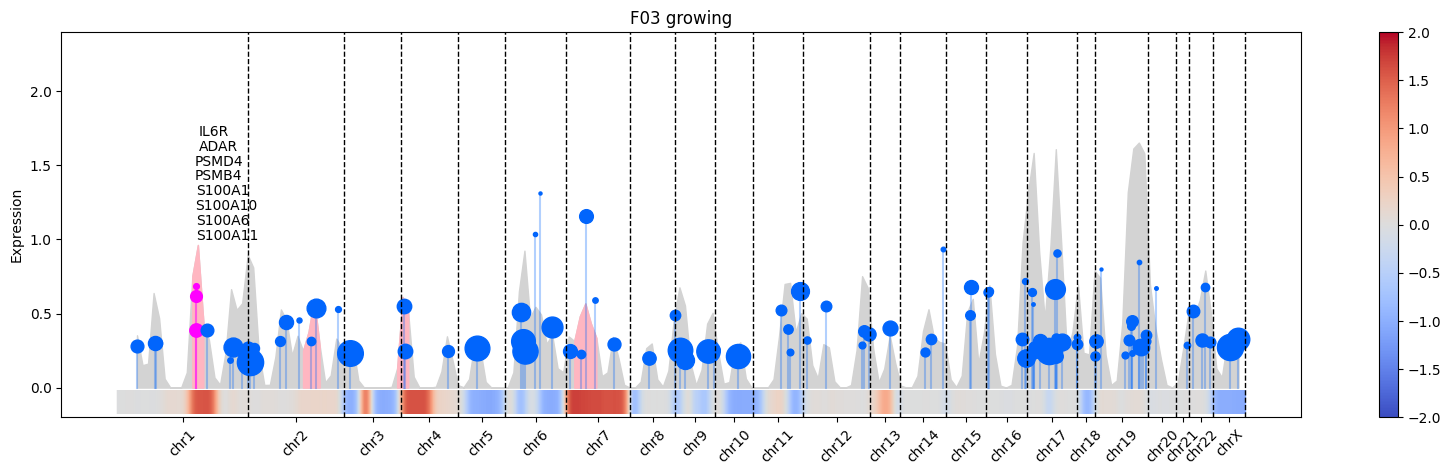

In [38]:
#hotspot genes in growing
all_hs_genes = {}
select_hs_genes = {}
smoothed_eta = {}
for pt in ["F03"]:
    smooth_eta, alls, plotlist = run_patient(pt,"growing", mode=1, bw_adjust=.03)
plt.savefig("mel_figures/figure_1/Fig1_lollipop.pdf")

In [ ]:
all_delta_eta = all_delta_eta.dropna()

In [326]:
X = sc.read_h5ad(PATH+"F03"+"/"+"F03"+"_X.h5")

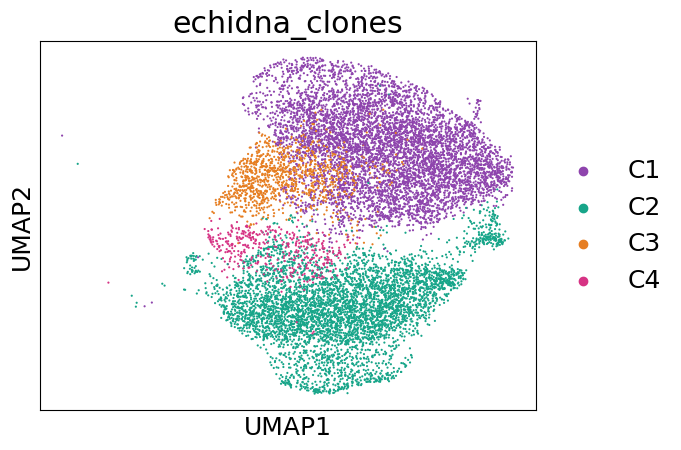

In [333]:
pal = {
    "C1": "#8E44AD",  # Rich Purple  
    "C2": "#17A589",  # Vibrant Teal  
    "C3": "#E67E22",  # Bold Orange  
    "C4": "#D63384"   # Strong Pink  
}
sc.pl.umap(X, color="echidna_clones", palette=pal, save="Fig1_clones.pdf")

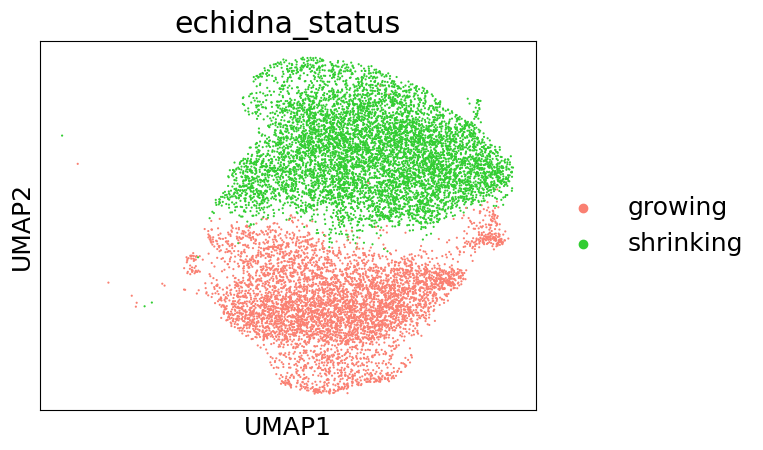

In [334]:
pal = {
    "growing": "salmon",  # Rich Purple  
    "shrinking": "limegreen",  # Vibrant Teal  
    "stable": "grey",  # Bold Orange  
}
sc.pl.umap(X, color="echidna_status", palette=pal, save="Fig1_status.pdf")

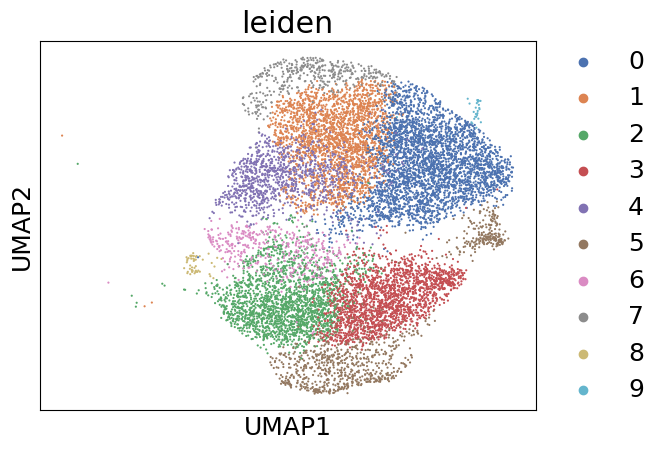

In [335]:
pal = {
    "growing": "salmon",  # Rich Purple  
    "shrinking": "limegreen",  # Vibrant Teal  
    "stable": "grey",  # Bold Orange  
}
sc.pl.umap(X, color="leiden", save="Fig1_leiden.pdf")

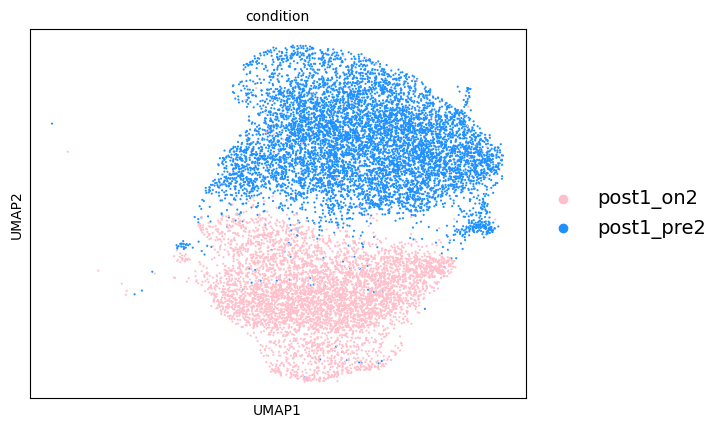

In [481]:
pal = {
    "post1_pre2": "dodgerblue",  # Rich Purple  
    "post1_on2": "pink",  # Vibrant Teal  
}
sc.pl.umap(X, color="condition", palette=pal, save="Fig1_timepoint.pdf")

In [441]:
eta = pd.read_csv(PATH+"F03"+"/"+"F03"+"_delta_eta.csv", index_col=0)

In [464]:
chr_lines, chr_list, genes = eta_no_bin(eta)

In [471]:
plt.rcParams.update({'font.size': 14}) 

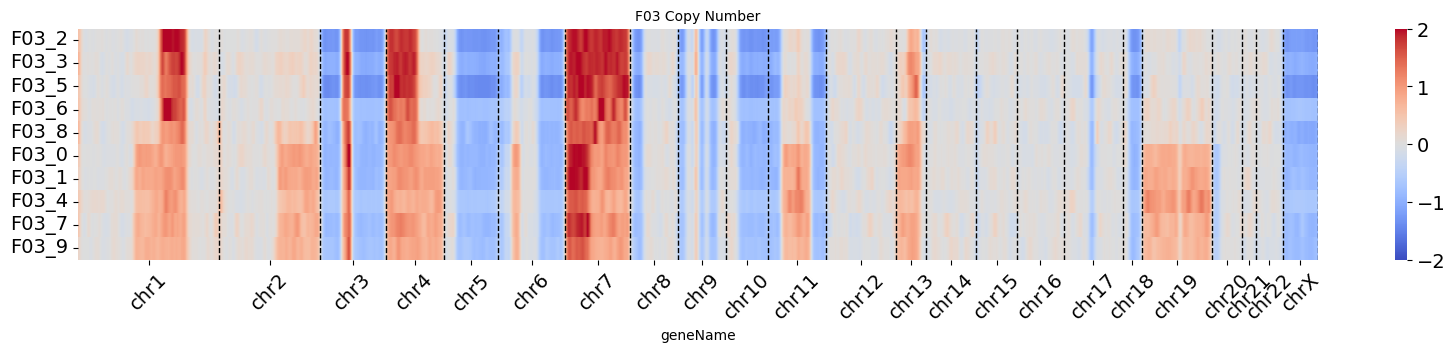

In [473]:
plt.figure(figsize=(20,3))
eta_smoothed = scipy.ndimage.gaussian_filter1d(eta.T, sigma=10, radius=50, axis=1)
eta_smoothed = pd.DataFrame(eta_smoothed, columns = eta.index, index = eta.columns)
sns.heatmap(eta_smoothed.loc[status.loc[eta_smoothed.index].sort_values(by=0).index], cmap='coolwarm', vmin=-2, vmax=2)
ticklines = []
for i in range(len(chr_lines)):
    plt.axvline(x=chr_lines[i], color='black', linestyle='--', linewidth=1)
    if i==0:
        ticklines.append(chr_lines[i]-.5*chr_lines[0])
        #plt.text(draw_lines[i]-.5*draw_lines[0], delta_wgs.T.shape[0]+.4, chr_list[i], color='black', fontsize=10, rotation=45)
    else:
        ticklines.append(chr_lines[i-1]+.5*(chr_lines[i]-chr_lines[i-1]))
        #plt.text(draw_lines[i-1]+.5*(draw_lines[i]-draw_lines[i-1]), delta_wgs.T.shape[0]+.4, chr_list[i], color='black', fontsize=10, rotation=45)
plt.xticks(ticklines, labels=chr_list, rotation=45)
plt.title("F03 Copy Number")
plt.savefig("mel_figures/figure_1/F03_eta.pdf")